In [152]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter



In [2]:
data = pd.read_csv('../data/interim/data_02.csv', index_col=0)
data.head()

,Title,Year,Source title,Abstract,Index Keywords,Cited by,Publisher,Language of Original Document,Document Type,countries,Funding Entities,Main Country,Period,Number of collaborators
0,Severe proliferative retinopathy in a patient ...,2023,American Journal of Ophthalmology Case Reports,[No abstract available],"['adult', ' Article', ' autoimmune hepatitis...",0.0,Elsevier Inc.,English,Article,['United States'],[],['United States'],2014 - 2023,1
1,Plasma levels of E-selectin are associated wit...,2023,European Journal of Haematology,Background: The vascular endothelium is marked...,"['creatinine', ' endothelial leukocyte adhesi...",0.0,John Wiley and Sons Inc,English,Article,"['France', ' Guadeloupe']",[],['France'],2014 - 2023,2
2,Routine Ophthalmological Examination Rates in ...,2023,International Journal of Environmental Researc...,The American Academy of Ophthalmology and the ...,"['blood', ' cell organelle', ' COVID-19', ' ...",0.0,MDPI,English,Article,['United States'],"[Albert Einstein College of Medicine, Yeshiva ...",['United States'],2014 - 2023,1
3,Progress in and Prospects of Genome Editing To...,2023,Genes,"Programmable nucleases, such as zinc finger nu...","['atonal BHLH transcription factor 1', ' beta...",0.0,MDPI,English,Review,['South Korea'],[National Research Foundation],[],2014 - 2023,1
4,Screening for sickle-cell retinopathy,2023,Eye (Basingstoke),[No abstract available],"['crizanlizumab', ' vasculotropin antibody', ...",0.0,Springer Nature,English,Letter,['United Kingdom'],[],['United Kingdom'],2014 - 2023,1


## Pubilcation count Over the years

In [24]:
cols = ['Year','Period','countries','Document Type']
pub_count_df = data[cols]
pub_count_df.head()

,Year,Period,countries,Document Type
0,2023,2014 - 2023,['United States'],Article
1,2023,2014 - 2023,"['France', ' Guadeloupe']",Article
2,2023,2014 - 2023,['United States'],Article
3,2023,2014 - 2023,['South Korea'],Review
4,2023,2014 - 2023,['United Kingdom'],Letter


# Pubilcations across the years

In [25]:
year_counts = pub_count_df.groupby(['Year','Document Type'])['Year'].count().reset_index(name='counts')
year_counts.head()


,Year,Document Type,counts
0,1954,Article,1
1,1958,Article,1
2,1960,Article,1
3,1963,Review,1
4,1964,Article,1


In [26]:
x= year_counts['Year']
y= year_counts['counts']
stack = year_counts['Document Type']
fig = px.bar(data_frame= year_counts, x= 'Year', y='counts', color='Document Type', title='Number of publications over the years')
fig.show()

# Publications counts over ten year periods

In [27]:
period_count =  pub_count_df.groupby(['Period','Document Type'])['Period'].count().reset_index(name='counts')
fig = px.bar(data_frame= period_count, x= 'Period', y='counts', color='Document Type', title='Number of publications over 10 years')
fig.show()

## Exploding the countries

In [29]:
df = pub_count_df
df

,Year,Period,countries,Document Type
0,2023,2014 - 2023,['United States'],Article
1,2023,2014 - 2023,"['France', ' Guadeloupe']",Article
2,2023,2014 - 2023,['United States'],Article
3,2023,2014 - 2023,['South Korea'],Review
4,2023,2014 - 2023,['United Kingdom'],Letter
...,...,...,...,...
794,1964,1964 - 1973,[''],Article
795,1963,1954 - 1963,[''],Review
796,1960,1954 - 1963,[''],Article
797,1958,1954 - 1963,[''],Article


In [37]:
df['countries'] = df['countries'].str.replace("[",'').str.replace("]",'').str.replace("'",'')
df.head()

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\2150531759.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Period,countries,Document Type
0,2023,2014 - 2023,United States,Article
1,2023,2014 - 2023,"France, Guadeloupe",Article
2,2023,2014 - 2023,United States,Article
3,2023,2014 - 2023,South Korea,Review
4,2023,2014 - 2023,United Kingdom,Letter


In [38]:
df['countries'] = df['countries'].str.split(',')
df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\197004597.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Period,countries,Document Type
0,2023,2014 - 2023,[United States],Article
1,2023,2014 - 2023,"[France, Guadeloupe]",Article
2,2023,2014 - 2023,[United States],Article
3,2023,2014 - 2023,[South Korea],Review
4,2023,2014 - 2023,[United Kingdom],Letter
...,...,...,...,...
794,1964,1964 - 1973,[],Article
795,1963,1954 - 1963,[],Review
796,1960,1954 - 1963,[],Article
797,1958,1954 - 1963,[],Article


In [39]:
for index, row in df.iterrows():
    print (type(row[2]), row[2])

<class 'list'> ['United States']
<class 'list'> ['France', '  Guadeloupe']
<class 'list'> ['United States']
<class 'list'> ['South Korea']
<class 'list'> ['United Kingdom']
<class 'list'> ['Pakistan', '  South Korea']
<class 'list'> ['United Kingdom', '  Ghana', '  Niger', '  Nigeria', '  South Africa']
<class 'list'> ['France']
<class 'list'> ['France', '  Tunisia']
<class 'list'> ['Brazil']
<class 'list'> ['India']
<class 'list'> ['Germany']
<class 'list'> ['United States']
<class 'list'> ['Iran']
<class 'list'> ['Egypt']
<class 'list'> ['Malaysia']
<class 'list'> ['Bahrain']
<class 'list'> ['United States']
<class 'list'> ['United States']
<class 'list'> ['']
<class 'list'> ['Jordan', '  Kuwait', '  Qatar', '  United States']
<class 'list'> ['United States']
<class 'list'> ['France']
<class 'list'> ['France']
<class 'list'> ['United States']
<class 'list'> ['Australia', '  Germany', '  Denmark', '  Netherlands', '  Sweden', '  United States', '  South Africa']
<class 'list'> ['Franc

In [41]:
df2 = df.explode('countries')
df2

,Year,Period,countries,Document Type
0,2023,2014 - 2023,United States,Article
1,2023,2014 - 2023,France,Article
1,2023,2014 - 2023,Guadeloupe,Article
2,2023,2014 - 2023,United States,Article
3,2023,2014 - 2023,South Korea,Review
...,...,...,...,...
794,1964,1964 - 1973,,Article
795,1963,1954 - 1963,,Review
796,1960,1954 - 1963,,Article
797,1958,1954 - 1963,,Article


In [53]:
df2 = df2[df2['countries']!='']
df2.isnull().sum()

Year             0
Period           0
countries        0
Document Type    1
dtype: int64

In [54]:
df2= df2.dropna()

In [57]:
country_pub_count_df = df2
country_pub_count_df

,Year,Period,countries,Document Type
0,2023,2014 - 2023,United States,Article
1,2023,2014 - 2023,France,Article
1,2023,2014 - 2023,Guadeloupe,Article
2,2023,2014 - 2023,United States,Article
3,2023,2014 - 2023,South Korea,Review
...,...,...,...,...
785,1971,1964 - 1973,United States,Article
786,1971,1964 - 1973,United States,Article
789,1969,1964 - 1973,United States,Article
791,1967,1964 - 1973,United States,Article


In [58]:
df2.groupby('countries')['countries'].count()

countries
  Canada                  8
  Denmark                 1
  France                  6
  Germany                 2
  Ghana                   4
                       ... 
Turkey                    8
Uganda                    1
United Arab Emirates      2
United Kingdom           61
United States           327
Name: countries, Length: 99, dtype: int64

In [66]:
plot_df = df2[df2['countries']=='United Kingdom'].groupby(['Year','Document Type'])['Year'].count().reset_index(name='counts')
fig = px.bar(plot_df, x='Year', y='counts', color='Document Type')
fig.show()



In [67]:
country_pub_count_df.to_csv('../data/processed/publication_count.csv')

# Citation counts

In [110]:
cols = ['Year','Period','countries','Document Type','Cited by']
citation_count_df = data[cols]
citation_count_df.head()

,Year,Period,countries,Document Type,Cited by
0,2023,2014 - 2023,['United States'],Article,0.0
1,2023,2014 - 2023,"['France', ' Guadeloupe']",Article,0.0
2,2023,2014 - 2023,['United States'],Article,0.0
3,2023,2014 - 2023,['South Korea'],Review,0.0
4,2023,2014 - 2023,['United Kingdom'],Letter,0.0


In [111]:
citation_count_df = citation_count_df[citation_count_df['Cited by'] != 0]


In [112]:
citation_count_df['countries'] = citation_count_df['countries'].str.replace("[",'').str.replace("]",'').str.replace("'",'')
citation_count_df.head()

,Year,Period,countries,Document Type,Cited by
13,2023,2014 - 2023,Iran,Review,1.0
15,2022,2014 - 2023,Malaysia,Article,1.0
20,2022,2014 - 2023,"Jordan, Kuwait, Qatar, United States",Article,1.0
23,2022,2014 - 2023,France,Article,1.0
25,2022,2014 - 2023,"Australia, Germany, Denmark, Netherlands, ...",Article,11.0


In [113]:
citation_count_df['countries'] = citation_count_df['countries'].str.split(',')


In [114]:
citation_count_df = citation_count_df.explode('countries')
citation_count_df.head()

,Year,Period,countries,Document Type,Cited by
13,2023,2014 - 2023,Iran,Review,1.0
15,2022,2014 - 2023,Malaysia,Article,1.0
20,2022,2014 - 2023,Jordan,Article,1.0
20,2022,2014 - 2023,Kuwait,Article,1.0
20,2022,2014 - 2023,Qatar,Article,1.0


In [115]:
citation_count_df['countries'] = citation_count_df['countries'].str.strip()
citation_count_df['countries'].value_counts()

countries
United States           350
United Kingdom           63
France                   52
Brazil                   42
Jamaica                  42
                       ... 
Cameroon                  1
United Arab Emirates      1
Hong Kong                 1
Poland                    1
Monaco                    1
Name: count, Length: 64, dtype: int64

In [118]:
#dropping rows with empty countries
citation_count_df = citation_count_df[citation_count_df['countries']!='']
citation_count_df


,Year,Period,countries,Document Type,Cited by
13,2023,2014 - 2023,Iran,Review,1.0
15,2022,2014 - 2023,Malaysia,Article,1.0
20,2022,2014 - 2023,Jordan,Article,1.0
20,2022,2014 - 2023,Kuwait,Article,1.0
20,2022,2014 - 2023,Qatar,Article,1.0
...,...,...,...,...,...
785,1971,1964 - 1973,United States,Article,120.0
786,1971,1964 - 1973,United States,Article,203.0
789,1969,1964 - 1973,United States,Article,7.0
791,1967,1964 - 1973,United States,Article,5.0


In [122]:
citation_count_df.groupby(['countries'], as_index=False)['Cited by'].sum()

,countries,Cited by
0,"""Cote dIvoire""",12.0
1,Argentina,25.0
2,Australia,56.0
3,Belgium,8.0
4,Benin,2.0
...,...,...
58,Turkey,87.0
59,United Arab Emirates,24.0
60,United Kingdom,1468.0
61,United States,12244.0


In [124]:
graph_df = citation_count_df.groupby(['countries'], as_index=False)['Cited by'].sum()
fig = px.bar(graph_df, x='countries', y='Cited by')
fig.show()

In [393]:
citation_df = citation_count_df.groupby(['countries'], as_index=False)['Cited by'].sum()
citation_df.to_csv('../data/processed/citation_count.csv')

# Collaboration

In [377]:
colab_df = data[['countries']]
colab_df['countries'] = colab_df['countries'].str.replace("[",'').str.replace("]",'').str.replace("'",'')
colab_df['countries']= colab_df['countries'].str.strip()
print (colab_df['countries'].iloc[79])
colab_df['countries']=colab_df['countries'].str.split(',')
print (colab_df['countries'].iloc[79])

to_delete = list()
for index,row in colab_df.iterrows():
    if row[0][0] == '':
        to_delete.append(index)

#deleting empty rows
colab_df.drop(to_delete, inplace=True)

#removing any unnecessary negative space that might make 'canada' = ' canada'

colab_df['countries'] = colab_df['countries'].apply(lambda row: [x.strip() for x in row])
print (colab_df['countries'].iloc[79])

#removing duplicate countries from collaborators list
colab_df['countries'] = colab_df['countries'].apply(lambda row: [*set(row)])


Canada,  Jamaica,  Canada
['Canada', '  Jamaica', '  Canada']
['Canada', 'Hong Kong', 'Kuwait', 'Canada']


C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\1987561357.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\1987561357.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\1987561357.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [282]:
#removing the punctuation marks to make it convertible into a list
colab_df['countries'] = colab_df['countries'].str.replace("[",'').str.replace("]",'').str.replace("'",'')
colab_df


C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\158266411.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countries
0,United States
1,"France, Guadeloupe"
2,United States
3,South Korea
4,United Kingdom
...,...
794,
795,
796,
797,


In [283]:
#removing any unnecessary negative space that might make 'canada' = ' canada'
colab_df['countries']= colab_df['countries'].str.strip()
colab_df['countries'].iloc[79]


C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\2419257378.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Canada,  Jamaica,  Canada'

In [284]:
#splitting the str into a list of countries
colab_df['countries']=colab_df['countries'].str.split(',')
colab_df['countries'].iloc[79]


C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\254903945.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['Canada', '  Jamaica', '  Canada']

In [268]:
to_delete = list()
for index,row in colab_df.iterrows():
    if row[0][0] == '':
        to_delete.append(index)
to_delete

[19,
 119,
 151,
 168,
 279,
 407,
 434,
 464,
 519,
 537,
 570,
 606,
 609,
 619,
 636,
 645,
 646,
 656,
 663,
 671,
 677,
 678,
 682,
 683,
 715,
 719,
 720,
 729,
 730,
 734,
 756,
 757,
 758,
 759,
 769,
 774,
 775,
 776,
 782,
 787,
 788,
 790,
 792,
 793,
 794,
 795,
 796,
 797]

In [285]:
#deleting empty rows
colab_df.drop(to_delete, inplace=True)

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\960603256.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [286]:
colab_df

,countries
0,[United States]
1,"[France, Guadeloupe]"
2,[United States]
3,[South Korea]
4,[United Kingdom]
...,...
785,[United States]
786,[United States]
789,[United States]
791,[United States]


In [287]:
#removing any unnecessary negative space that might make 'canada' = ' canada'

colab_df['countries'] = colab_df['countries'].apply(lambda row: [x.strip() for x in row])
colab_df['countries'].iloc[79]


C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\841956423.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['Canada', 'Hong Kong', 'Kuwait', 'Canada']

In [288]:
#removing duplicate countries from collaborators list
colab_df['countries'] = colab_df['countries'].apply(lambda row: [*set(row)])
colab_df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\3634684226.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countries
0,[United States]
1,"[Guadeloupe, France]"
2,[United States]
3,[South Korea]
4,[United Kingdom]
...,...
785,[United States]
786,[United States]
789,[United States]
791,[United States]


In [346]:
colab_df

,countries
0,[United States]
1,"[Guadeloupe, France]"
2,[United States]
3,[South Korea]
4,[United Kingdom]
...,...
785,[United States]
786,[United States]
789,[United States]
791,[United States]


In [378]:
colabs = colab_df[['countries']]
colabs.reset_index(drop=True, inplace=True)

In [348]:
colabs

,countries
0,[United States]
1,"[Guadeloupe, France]"
2,[United States]
3,[South Korea]
4,[United Kingdom]
...,...
746,[United States]
747,[United States]
748,[United States]
749,[United States]


In [349]:
colabs.index[-1]

750

In [350]:
test = ['Kuwait', 'Hong Kong', 'Canada']
print(test)
while len(test)>1:
    source = test.pop(0)
    target = test
    print(source, target)

['Kuwait', 'Hong Kong', 'Canada']
Kuwait ['Hong Kong', 'Canada']
Hong Kong ['Canada']


In [381]:
#creating sources and target
country_relations=[]
i= 0
while i in range(colabs.index[-1]):
    country_list = colabs.loc[i].countries
    to_remove = []
    if len(country_list) > 1:
        for index,country in enumerate(country_list[:-1]):
            source = country
            to_remove.append(country)
            target = [x for x in country_list if x not in to_remove]
            # print (source,target)
        
        # while len(country_list)>1:
        #     source = country_list.pop(0)
        #     target = country_list

        #     print (source,target)
            country_relations.append({'source': source, 'target': target})
    i += 1
country_relations

[{'source': 'Guadeloupe', 'target': ['France']},
 {'source': 'South Korea', 'target': ['Pakistan']},
 {'source': 'Niger',
  'target': ['United Kingdom', 'Nigeria', 'South Africa', 'Ghana']},
 {'source': 'United Kingdom', 'target': ['Nigeria', 'South Africa', 'Ghana']},
 {'source': 'Nigeria', 'target': ['South Africa', 'Ghana']},
 {'source': 'South Africa', 'target': ['Ghana']},
 {'source': 'Tunisia', 'target': ['France']},
 {'source': 'Qatar', 'target': ['United States', 'Jordan', 'Kuwait']},
 {'source': 'United States', 'target': ['Jordan', 'Kuwait']},
 {'source': 'Jordan', 'target': ['Kuwait']},
 {'source': 'Germany',
  'target': ['United States',
   'Australia',
   'Sweden',
   'Netherlands',
   'South Africa',
   'Denmark']},
 {'source': 'United States',
  'target': ['Australia', 'Sweden', 'Netherlands', 'South Africa', 'Denmark']},
 {'source': 'Australia',
  'target': ['Sweden', 'Netherlands', 'South Africa', 'Denmark']},
 {'source': 'Sweden', 'target': ['Netherlands', 'South Afri

In [382]:
collaborators_df = pd.DataFrame(country_relations)
collaborators_df

,source,target
0,Guadeloupe,[France]
1,South Korea,[Pakistan]
2,Niger,"[United Kingdom, Nigeria, South Africa, Ghana]"
3,United Kingdom,"[Nigeria, South Africa, Ghana]"
4,Nigeria,"[South Africa, Ghana]"
...,...,...
188,Jamaica,[Ireland]
189,Brazil,[United States]
190,Jamaica,[United Kingdom]
191,Jamaica,[United Kingdom]


In [385]:
collaborators_df = collaborators_df.explode('target')
collaborators_df

,source,target
0,Guadeloupe,France
1,South Korea,Pakistan
2,Niger,United Kingdom
2,Niger,Nigeria
2,Niger,South Africa
...,...,...
188,Jamaica,Ireland
189,Brazil,United States
190,Jamaica,United Kingdom
191,Jamaica,United Kingdom


In [389]:
#sort rows column wise to fix any reverse interactions  eg a->b = b->a
collaborators_df = pd.DataFrame(np.sort(collaborators_df.values,axis = 1), columns = collaborators_df.columns)
collaborators_df

,source,target
0,France,Guadeloupe
1,Pakistan,South Korea
2,Niger,United Kingdom
3,Niger,Nigeria
4,Niger,South Africa
...,...,...
248,Ireland,Jamaica
249,Brazil,United States
250,Jamaica,United Kingdom
251,Jamaica,United Kingdom


In [390]:
#aggregate collaborations for each country pair and add a wieght column
collaborators_df['value']= 1
collaborators_df = collaborators_df.groupby(['source','target'],sort=False, as_index=False).sum()
collaborators_df

,source,target,value
0,France,Guadeloupe,8
1,Pakistan,South Korea,1
2,Niger,United Kingdom,1
3,Niger,Nigeria,23
4,Niger,South Africa,1
...,...,...,...
122,Germany,Jamaica,1
123,Jamaica,Trinidad and Tobago,1
124,New Zealand,United States,1
125,Belgium,United States,1


In [391]:
collaborators_df.to_csv('../data/processed/collaborations.csv')

# Journals

In [408]:
cols = ['Year', 'Source title','Period']
journals = data[cols]
journals


,Year,Source title,Period
0,2023,American Journal of Ophthalmology Case Reports,2014 - 2023
1,2023,European Journal of Haematology,2014 - 2023
2,2023,International Journal of Environmental Researc...,2014 - 2023
3,2023,Genes,2014 - 2023
4,2023,Eye (Basingstoke),2014 - 2023
...,...,...,...
794,1964,Transactions - American Academy of Ophthalmolo...,1964 - 1973
795,1963,Belgisch tijdschrift voor geneeskunde,1954 - 1963
796,1960,Klinische Monatsblätter für Augenheilkunde und...,1954 - 1963
797,1958,The Mississippi doctor,1954 - 1963


In [411]:
journals['counts'] = 1
plot = journals[journals['Source title']=='American Journal of Ophthalmology']
plot.groupby(['Source title', 'Period'],sort=True, as_index=False).sum()





C:\Users\Sherrif\AppData\Local\Temp\ipykernel_17892\150703565.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Source title,Period,Year,counts
0,American Journal of Ophthalmology,1954 - 1963,1954,1
1,American Journal of Ophthalmology,1964 - 1973,13799,7
2,American Journal of Ophthalmology,1974 - 1983,29675,15
3,American Journal of Ophthalmology,1984 - 1993,5967,3
4,American Journal of Ophthalmology,1994 - 2003,3997,2
5,American Journal of Ophthalmology,2004 - 2013,4022,2
6,American Journal of Ophthalmology,2014 - 2023,20177,10


In [413]:
journals.to_csv('../data/processed/journals_df.csv')

In [414]:
data.columns

Index(['Title', 'Year', 'Source title', 'Abstract', 'Index Keywords',
       'Cited by', 'Publisher', 'Language of Original Document',
       'Document Type', 'countries', 'Funding Entities', 'Main Country',
       'Period', 'Number of collaborators'],
      dtype='object')

# Publications Languages and Document type

In [416]:
cols = ['Language of Original Document','Document Type']
pub_doc = data[cols]
pub_doc


,Language of Original Document,Document Type
0,English,Article
1,English,Article
2,English,Article
3,English,Review
4,English,Letter
...,...,...
794,English,Article
795,Dutch,Review
796,German,Article
797,English,Article


In [417]:
pub_doc.isnull().sum()

Language of Original Document    0
Document Type                    3
dtype: int64

In [418]:
pub_doc['Language of Original Document'].value_counts()

Language of Original Document
English                726
French                  28
English; French         11
German                  10
Portuguese               9
Spanish                  3
English; Portuguese      2
English; Spanish         2
Italian                  2
Japanese                 2
Dutch                    2
Chinese                  1
Russian                  1
Name: count, dtype: int64

In [425]:
lang_df = pub_doc[['Language of Original Document']]
lang_df['counts']=1
lang_df = lang_df.groupby('Language of Original Document',as_index=False).sum()
fig = px.bar(lang_df, x='Language of Original Document', y='counts')
fig.show()

In [427]:
lang_df.to_csv('../data/processed/lang_data.csv')

In [428]:
pub_doc['Document Type'].value_counts()

Document Type
Article             574
Review              125
Letter               39
Note                 19
Book Chapter         16
Conference Paper     12
Editorial             5
Erratum               2
Short Survey          2
Data Paper            1
Book                  1
Name: count, dtype: int64

In [429]:
doc_type = pub_doc[['Document Type']]
doc_type['counts']=1
doc_type =doc_type.groupby('Document Type',as_index=False).sum()
fig = px.bar(doc_type, x='Document Type', y='counts')
fig.show()

In [431]:
doc_type.to_csv('../data/processed/doc_type.csv')

# Funding entities and Number of collaborators

In [3]:
data.columns

Index(['Title', 'Year', 'Source title', 'Abstract', 'Index Keywords',
       'Cited by', 'Publisher', 'Language of Original Document',
       'Document Type', 'countries', 'Funding Entities', 'Main Country',
       'Period', 'Number of collaborators'],
      dtype='object')

In [4]:
cols=['Year','Number of collaborators','Period','Funding Entities']
df=data[cols]
df.head()

,Year,Number of collaborators,Period,Funding Entities
0,2023,1,2014 - 2023,[]
1,2023,2,2014 - 2023,[]
2,2023,1,2014 - 2023,"[Albert Einstein College of Medicine, Yeshiva ..."
3,2023,1,2014 - 2023,[National Research Foundation]
4,2023,1,2014 - 2023,[]


In [26]:
df['Number of collaborators'].value_counts()

Number of collaborators
1    643
2    124
3     25
5      3
4      3
7      1
Name: count, dtype: int64

In [27]:
plot_df= df[['Number of collaborators','Year']]
plot_df

,Number of collaborators,Year
0,1,2023
1,2,2023
2,1,2023
3,1,2023
4,1,2023
...,...,...
794,1,1964
795,1,1963
796,1,1960
797,1,1958


In [28]:
category = pd.cut(plot_df['Number of collaborators'], bins=[0,1,2,8], labels=['single country', 'two countries','> 2 countries'])
category

0      single country
1       two countries
2      single country
3      single country
4      single country
            ...      
794    single country
795    single country
796    single country
797    single country
798    single country
Name: Number of collaborators, Length: 799, dtype: category
Categories (3, object): ['single country' < 'two countries' < '> 2 countries']

In [29]:
df['Number of Countries'] = category
df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\618861208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Countries'] = category


,Year,Number of collaborators,Period,Funding Entities,Number of Countries
0,2023,1,2014 - 2023,[],single country
1,2023,2,2014 - 2023,[],two countries
2,2023,1,2014 - 2023,"[Albert Einstein College of Medicine, Yeshiva ...",single country
3,2023,1,2014 - 2023,[National Research Foundation],single country
4,2023,1,2014 - 2023,[],single country
...,...,...,...,...,...
794,1964,1,1964 - 1973,[],single country
795,1963,1,1954 - 1963,[],single country
796,1960,1,1954 - 1963,[],single country
797,1958,1,1954 - 1963,[],single country


<Axes: >

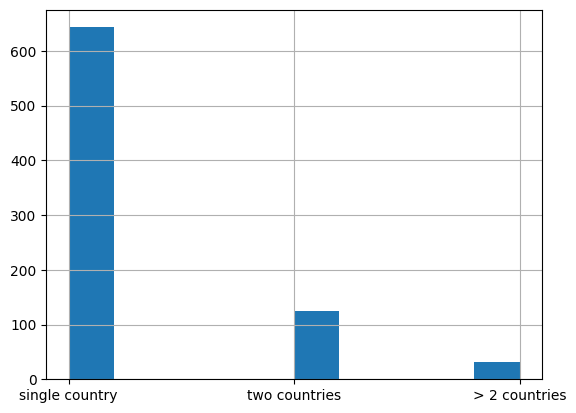

In [32]:
import matplotlib
df['Number of Countries'].hist()

In [38]:
test_df = df[['Year','Number of Countries']]

In [40]:
test_df['count']=1
test_df = test_df.groupby(['Year','Number of Countries']).count()
test_df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\3475202038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['count']=1


count
Year Number of Countries       
1954 single country           1
     two countries            0
     > 2 countries            0
1958 single country           1
     two countries            0
...                         ...
2022 two countries            3
     > 2 countries            2
2023 single country          11
     two countries            3
     > 2 countries            1

[183 rows x 1 columns]

In [44]:
test_df = test_df.reset_index()

In [46]:
test_df = test_df.pivot(index='Year', columns='Number of Countries', values='count')
test_df 

Number of Countries,single country,two countries,> 2 countries
Year,,,
1954,1,0,0
1958,1,0,0
1960,1,0,0
1963,1,0,0
1964,1,0,0
...,...,...,...
2019,34,10,3
2020,24,9,3
2021,31,11,8


In [50]:
test_df=test_df.reset_index()

In [51]:
fig = px.line(test_df, x='Year', y=['single country','two countries','> 2 countries'])
fig.show()

In [52]:
test_df.to_csv('../data/processed/number_of_countries.csv')

In [127]:
funding_df = df[['Funding Entities']]

In [128]:
funding_df ['Funding Entities'] = funding_df ['Funding Entities'].str.replace('[','').str.replace("'",'').str.replace(']','')
funding_df ['Funding Entities']=funding_df ['Funding Entities'].str.split(',')
funding_df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\1817027175.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\1817027175.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Funding Entities
0,[]
1,[]
2,"[Albert Einstein College of Medicine, Yeshiva..."
3,[National Research Foundation]
4,[]
...,...
794,[]
795,[]
796,[]
797,[]


In [129]:
funding_df = funding_df.explode('Funding Entities')

In [130]:
funding_df= funding_df[funding_df['Funding Entities']!='']
funding_df = funding_df['Funding Entities'].str.strip()
funding_df.value_counts()

Funding Entities
National Heart                         72
Blood Institute                        70
National Eye Institute                 65
National Institutes of Health          49
NIH                                    47
                                       ..
de Pessoal de N&#x00ED;vel Superior     1
Victoria University                     1
ANR                                     1
Agence Nationale de la Recherche        1
RTI                                     1
Name: count, Length: 168, dtype: int64

In [131]:
funding_df = funding_df.to_frame('Funding Entites')

In [132]:
to_replace = ['Blood Institute','National Heart','Lung Institute']
funding_df['Funding Entites'].loc[funding_df['Funding Entites'].isin(to_replace)] = 'National Heart,Lung and Blood Institute'

In [133]:
funding_df['counts']=1
funding_df = funding_df.groupby('Funding Entites').count()
funding_df


,counts
Funding Entites,
ACC,1
AHA,1
ANR,1
ANR‐11‐IDEX‐0005‐02,1
ASH,1
...,...
Yale University,1
Yeshiva University,1
Z01DK075008,1


In [134]:
funding_df = funding_df.reset_index()

In [135]:
fig = px.bar(funding_df, x='Funding Entites', y='counts')
fig.show()

In [136]:
funding_df.to_csv('../data/processed/funding_data.csv')

# Keywords 

In [139]:
data.columns

Index(['Title', 'Year', 'Source title', 'Abstract', 'Index Keywords',
       'Cited by', 'Publisher', 'Language of Original Document',
       'Document Type', 'countries', 'Funding Entities', 'Main Country',
       'Period', 'Number of collaborators'],
      dtype='object')

In [181]:
cols = [ 'Year','Period','Index Keywords']
keywords_df = data[cols]
keywords_df

,Year,Period,Index Keywords
0,2023,2014 - 2023,"['adult', ' Article', ' autoimmune hepatitis..."
1,2023,2014 - 2023,"['creatinine', ' endothelial leukocyte adhesi..."
2,2023,2014 - 2023,"['blood', ' cell organelle', ' COVID-19', ' ..."
3,2023,2014 - 2023,"['atonal BHLH transcription factor 1', ' beta..."
4,2023,2014 - 2023,"['crizanlizumab', ' vasculotropin antibody', ..."
...,...,...,...
794,1964,1964 - 1973,"['hemoglobin', ' article', ' diabetes mellit..."
795,1963,1954 - 1963,"['angioid streak', ' aorta aneurysm', ' bloo..."
796,1960,1954 - 1963,"['complication', ' diseases', ' retina', ' ..."
797,1958,1954 - 1963,"['bleeding', ' complication', ' retina', ' ..."


In [182]:
keywords_df['Index Keywords']=keywords_df['Index Keywords'].str.replace('[','').str.replace("'",'').str.replace(']','')
keywords_df['Index Keywords'] = keywords_df['Index Keywords'].str.strip()
keywords_df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\1108680909.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\1108680909.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Period,Index Keywords
0,2023,2014 - 2023,"adult, Article, autoimmune hepatitis, bl..."
1,2023,2014 - 2023,"creatinine, endothelial leukocyte adhesion m..."
2,2023,2014 - 2023,"blood, cell organelle, COVID-19, epidemi..."
3,2023,2014 - 2023,"atonal BHLH transcription factor 1, beta act..."
4,2023,2014 - 2023,"crizanlizumab, vasculotropin antibody, cli..."
...,...,...,...
794,1964,1964 - 1973,"hemoglobin, article, diabetes mellitus, ..."
795,1963,1954 - 1963,"angioid streak, aorta aneurysm, blood clot..."
796,1960,1954 - 1963,"complication, diseases, retina, sickle c..."
797,1958,1954 - 1963,"bleeding, complication, retina, sickle c..."


In [183]:
keywords_df['Index Keywords']=keywords_df['Index Keywords'].str.lower().str.split(',')
keywords_df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\4058073483.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Period,Index Keywords
0,2023,2014 - 2023,"[adult, article, autoimmune hepatitis, ..."
1,2023,2014 - 2023,"[creatinine, endothelial leukocyte adhesion..."
2,2023,2014 - 2023,"[blood, cell organelle, covid-19, epi..."
3,2023,2014 - 2023,"[atonal bhlh transcription factor 1, beta a..."
4,2023,2014 - 2023,"[crizanlizumab, vasculotropin antibody, ..."
...,...,...,...
794,1964,1964 - 1973,"[hemoglobin, article, diabetes mellitus,..."
795,1963,1954 - 1963,"[angioid streak, aorta aneurysm, blood c..."
796,1960,1954 - 1963,"[complication, diseases, retina, sick..."
797,1958,1954 - 1963,"[bleeding, complication, retina, sick..."


In [186]:
keywords_df.isnull().sum()

Year              0
Period            0
Index Keywords    0
dtype: int64

In [185]:
keywords_df.dropna(inplace=True)

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\753494095.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
keywords_year = keywords_df.groupby(['Year']).agg({'Index Keywords':'sum', 'Period':'first'}).reset_index()
keywords_year


,Year,Index Keywords,Period
0,1954,"[bleeding, diseases, retina, sickle c...",1954 - 1963
1,1958,"[bleeding, complication, retina, sick...",1954 - 1963
2,1960,"[complication, diseases, retina, sick...",1954 - 1963
3,1963,"[angioid streak, aorta aneurysm, blood c...",1954 - 1963
4,1964,"[hemoglobin, article, diabetes mellitus,...",1964 - 1973
...,...,...,...
56,2019,"[diagnostic imaging, disease severity, f...",2014 - 2023
57,2020,"[bevacizumab, ceftazidime, cotrimoxazole...",2014 - 2023
58,2021,"[deferasirox, deferiprone, deferoxamine,...",2014 - 2023
59,2022,"[adult, adverse event, age, article, ...",2014 - 2023


In [188]:
keywords_decade = keywords_df.groupby(['Period']).agg({'Index Keywords':'sum'}).reset_index()
keywords_decade

,Period,Index Keywords
0,1954 - 1963,"[angioid streak, aorta aneurysm, blood c..."
1,1964 - 1973,"[blindness, diabetes mellitus, hemoglobi..."
2,1974 - 1983,"[diagnostic agent, fibrin, fluorescein, ..."
3,1984 - 1993,"[adult, aged, article, biomicroscopy,..."
4,1994 - 2003,"[anemia, cataract, clinical feature, ..."
5,2004 - 2013,"[article, blood rheology, blood viscosit..."
6,2014 - 2023,"[adult, article, autoimmune hepatitis, ..."


In [221]:
keywords_decade = keywords_decade.explode('Index Keywords')
keywords_decade

,Period,Index Keywords
0,1954 - 1963,angioid streak
0,1954 - 1963,aorta aneurysm
0,1954 - 1963,blood clotting disorder
0,1954 - 1963,cardiovascular disease
0,1954 - 1963,ehlers danlos syndrome
...,...,...
6,2014 - 2023,treatment outcome
6,2014 - 2023,vitrectomy
6,2014 - 2023,vitreoretinal surgery
6,2014 - 2023,vitreous hemorrhage


In [225]:
keywords_decade['count']=1
keywords_decade = keywords_decade.groupby(['Index Keywords','Period']).count()
keywords_decade

,,count
Index Keywords,Period,
1 (4 dimethylamino 3 methylbenzyl) 5 diphenylacetyl 4,2014 - 2023,1
13-valent pneumococcal vaccine,2014 - 2023,1
2,2004 - 2013,1
23 gauge vitrectomy,2014 - 2023,1
23-valent pneumococcal capsular polysaccharide vaccine,2014 - 2023,1
...,...,...
vasculotropin inhibitor,2014 - 2023,1
visual pigment,2004 - 2013,1
von hippel lindau protein,2014 - 2023,1


In [227]:
keywords_decade = keywords_decade.reset_index()
keywords_decade = keywords_decade.pivot(index='Index Keywords', columns='Period', values='count')
keywords_decade

Period,1954 - 1963,1964 - 1973,1974 - 1983,1984 - 1993,1994 - 2003,2004 - 2013,2014 - 2023
Index Keywords,,,,,,,
1 (4 dimethylamino 3 methylbenzyl) 5 diphenylacetyl 4,NaN,NaN,NaN,NaN,NaN,NaN,1.0
13-valent pneumococcal vaccine,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN
23 gauge vitrectomy,NaN,NaN,NaN,NaN,NaN,NaN,1.0
23-valent pneumococcal capsular polysaccharide vaccine,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
vasculotropin,NaN,NaN,NaN,NaN,NaN,NaN,1.0
vasculotropin inhibitor,NaN,NaN,NaN,NaN,NaN,NaN,1.0
visual pigment,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [228]:
keywords_decade.fillna(0, inplace=True)
keywords_decade

Period,1954 - 1963,1964 - 1973,1974 - 1983,1984 - 1993,1994 - 2003,2004 - 2013,2014 - 2023
Index Keywords,,,,,,,
1 (4 dimethylamino 3 methylbenzyl) 5 diphenylacetyl 4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13-valent pneumococcal vaccine,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23 gauge vitrectomy,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23-valent pneumococcal capsular polysaccharide vaccine,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
vasculotropin,0.0,0.0,0.0,0.0,0.0,0.0,1.0
vasculotropin inhibitor,0.0,0.0,0.0,0.0,0.0,0.0,1.0
visual pigment,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# choropleth data

In [290]:
data = pd.read_csv('../data/processed/publication_count.csv', index_col=0)
data.head()

,Year,Period,countries,Document Type
0,2023,2014 - 2023,United States,Article
1,2023,2014 - 2023,France,Article
1,2023,2014 - 2023,Guadeloupe,Article
2,2023,2014 - 2023,United States,Article
3,2023,2014 - 2023,South Korea,Review


In [291]:
import pycountry

In [292]:
def get_alpha(country):
    try:
        return pycountry.countries.get(name=country.strip()).alpha_3
    except:
        return("not found")

In [293]:
data['code'] = data['countries'].apply(lambda row: get_alpha(row))
data

,Year,Period,countries,Document Type,code
0,2023,2014 - 2023,United States,Article,USA
1,2023,2014 - 2023,France,Article,FRA
1,2023,2014 - 2023,Guadeloupe,Article,GLP
2,2023,2014 - 2023,United States,Article,USA
3,2023,2014 - 2023,South Korea,Review,not found
...,...,...,...,...,...
785,1971,1964 - 1973,United States,Article,USA
786,1971,1964 - 1973,United States,Article,USA
789,1969,1964 - 1973,United States,Article,USA
791,1967,1964 - 1973,United States,Article,USA


In [303]:
data['code'][data['countries']=='"Cote dIvoire"'] = data['code'][data['countries']=='"Cote dIvoire"'].replace(['not found'],'CIV')

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_23052\1766407675.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [304]:
data[data['code']=='not found']

,Year,Period,countries,Document Type,code
5,2023,2014 - 2023,South Korea,Article,not found


In [266]:
pycountry.countries.get(name="Côte d'Ivoire").alpha_3

'CIV'

In [300]:
pycountry.countries.search_fuzzy('Cote')

[Country(alpha_2='CI', alpha_3='CIV', flag='🇨🇮', name="Côte d'Ivoire", numeric='384', official_name="Republic of Côte d'Ivoire"),
 Country(alpha_2='FR', alpha_3='FRA', flag='🇫🇷', name='France', numeric='250', official_name='French Republic'),
 Country(alpha_2='HN', alpha_3='HND', flag='🇭🇳', name='Honduras', numeric='340', official_name='Republic of Honduras')]

In [305]:
data['count']=1
data = data.groupby(['countries']).agg({'count':'sum', 'code':'first'})
data = data.reset_index()

In [306]:
data

,countries,count,code
0,Canada,8,CAN
1,Denmark,1,DNK
2,France,6,FRA
3,Germany,2,DEU
4,Ghana,4,GHA
...,...,...,...
94,Turkey,8,TUR
95,Uganda,1,UGA
96,United Arab Emirates,2,ARE
97,United Kingdom,61,GBR


In [307]:
data.to_csv('../data/processed/map_data.csv')

In [325]:
fig = go.Figure(data=go.Choropleth(
    locations = data['code'],
    z = data['count'],
    text = data['countries'],
    colorscale = 'algae',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '$',
    colorbar_title = 'Number of Publications',
))

fig.update_layout(
    title_text='Number of Sickle cell retinopathy publications',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        # text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
        #     CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

#  ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
#              'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
#              'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
#              'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
#              'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
#              'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
#              'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
#              'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
#              'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
#              'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
#              'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
#              'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
#              'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
#              'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
#              'ylorrd'].

In [322]:
fig = go.Figure(data=go.Choropleth(
    locations = data['code'],
    z = data['count'],
    text = data['countries'],
    colorscale = 'blugrn',
    autocolorscale=True,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '$',
    colorbar_title = 'Number of Publications',
))

fig.update_layout(
    title_text='Number of Sickle cell retinopathy publications',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        # text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
        #     CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()